<a href="https://colab.research.google.com/github/ThaiNguyenLongHai/Hai/blob/main/AI_Predict_ThucAnVN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import os
from keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten, Input
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pickle

Mounted at /content/drive


In [3]:
def load_data():
    file = open('/content/drive/MyDrive/Colab Notebooks/foods.data', 'rb')

    # dump information to that file
    (pixels, labels) = pickle.load(file)

    # close the file
    file.close()

    print(pixels.shape)
    print(labels.shape)

    return pixels, labels

images, labels = load_data()

(5500, 128, 128, 3)
(5500, 10)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state = 10)
X = X_test

In [5]:
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

In [6]:
model = Sequential()
model.add(Conv2D(32, (3,3), strides = (1,1), padding='same', activation='relu', input_shape=( 128, 128, 3)))
model.add(Conv2D(32, (3,3), strides = (1,1), padding='same', activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), strides = (1,1), padding='same', activation='relu'))
model.add(Conv2D(64, (3,3), strides = (1,1), padding='same', activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128, (3,3), strides = (1,1), padding='same', activation='relu'))
model.add(Conv2D(128, (3,3), strides = (1,1), padding='same', activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(256, (3,3), strides = (1,1), padding='same', activation='relu'))
model.add(Conv2D(256, (3,3), strides = (1,1), padding='same', activation='relu'))
model.add(Conv2D(256, (3,3), strides = (1,1), padding='same', activation='relu'))
model.add(MaxPooling2D((2,2)))


model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(256, activation='relu'))

model.add(Dense(10, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0002), metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                    

In [7]:
f = ImageDataGenerator(rotation_range=20,
                        width_shift_range=0.05,
                        height_shift_range=0.05,
                        shear_range=0.05,
                        zoom_range=0.05,
                        horizontal_flip=True,
                        fill_mode='nearest')

In [8]:
h = model.fit_generator(f.flow(X_train, y_train, batch_size=64), epochs=25, 
                        validation_data = f.flow(X_test,y_test, batch_size=64), verbose=1)

<ipython-input-8-6454e0fbcf96>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  h = model.fit_generator(f.flow(X_train, y_train, batch_size=64), epochs=25,


Epoch 1/25
69/69 [==============================] - 39s 315ms/step - loss: 2.2133 - accuracy: 0.1605 - val_loss: 2.1197 - val_accuracy: 0.2127
Epoch 2/25
69/69 [==============================] - 18s 267ms/step - loss: 2.0869 - accuracy: 0.2327 - val_loss: 2.1202 - val_accuracy: 0.2027
Epoch 3/25
69/69 [==============================] - 19s 272ms/step - loss: 2.0559 - accuracy: 0.2532 - val_loss: 2.0614 - val_accuracy: 0.2309
Epoch 4/25
69/69 [==============================] - 19s 270ms/step - loss: 1.9971 - accuracy: 0.2716 - val_loss: 2.0131 - val_accuracy: 0.2509
Epoch 5/25
69/69 [==============================] - 18s 266ms/step - loss: 1.9672 - accuracy: 0.2877 - val_loss: 2.0140 - val_accuracy: 0.2527
Epoch 6/25
69/69 [==============================] - 19s 275ms/step - loss: 1.8727 - accuracy: 0.3214 - val_loss: 1.9000 - val_accuracy: 0.3255
Epoch 7/25
69/69 [==============================] - 19s 272ms/step - loss: 1.7435 - accuracy: 0.3852 - val_loss: 1.7820 - val_accuracy: 0.3527

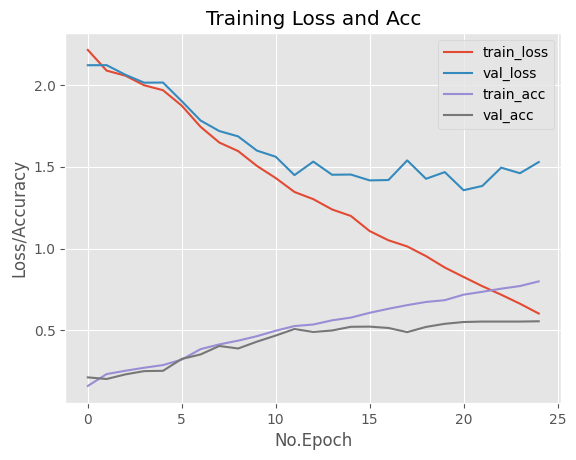

In [9]:
plt.style.use("ggplot")
plt.figure()

plt.plot(np.arange(0, 25), h.history["loss"], label="train_loss")
plt.plot(np.arange(0, 25), h.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 25), h.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 25), h.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Acc")

plt.xlabel("No.Epoch")
plt.ylabel("Loss/Accuracy")
plt.legend()

In [10]:
model.save('/content/drive/MyDrive/Colab Notebooks/ThucAN.h5')

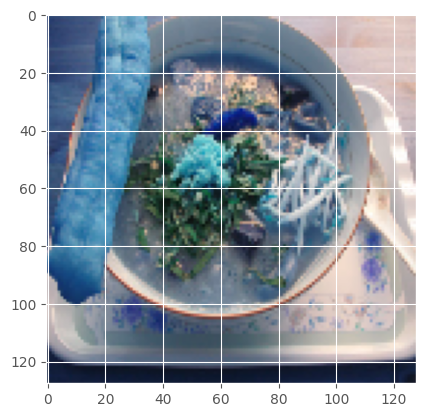

1/1 [==============================] - 0s 358ms/step
This picture is:  Chao long [6.5433024e-03 1.8855704e-03 6.7340949e-04 2.9598061e-02 2.7100032e-05
 7.1723253e-01 3.0172200e-04 9.9175179e-04 6.1584491e-04 2.4213074e-01]


In [11]:
class_name = ['Banh cuon', 'Banh mi', 'Banh xeo', 'Bun bo Hue', 'Bun dau mam tom', 'Chao long', 'Com tam', 'Goi cuon', 'Mi quang', 'Pho']
image = X[0]
c = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.imshow(c)
plt.show()

img = X_test[0]
img = np.expand_dims(img, axis = 0)
result = model.predict(img)
# print(result)
print("This picture is: ", class_name[np.argmax(result[0])], (result[0]))
# print(np.max(result[0],axis=0))